In [44]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux.detgeo import SimulateDecays, SimulateDetector, che, plot_sim, plot
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
cc = SimulateDecays('mutristan_small', N_evals = 1e5)

In [2]:
with open('mutristan_small.pkl', 'rb') as f:
    cc1 = pickle.load(f)

Simulation: muTRISTAN (s) (μ+e-) at L = 116.00 m with Det v2 as a detector
Total Count: 9.45e+08 events; took 0.814 s
+----------------+------------+------------+--------------+
| Detector Parts | ν_e events | ν_μ events | Total Events |
+----------------+------------+------------+--------------+
| muon_detector  | 1.234e+07  | 1.007e+07  |  2.241e+07   |
|    solenoid    | 0.000e+00  | 0.000e+00  |  0.000e+00   |
|      hcal      | 0.000e+00  | 0.000e+00  |  0.000e+00   |
|      ecal      | 0.000e+00  | 0.000e+00  |  0.000e+00   |
|    nozzles     | 5.563e+08  | 3.659e+08  |  9.222e+08   |
|     TOTAL      | 5.686e+08  | 3.760e+08  |  9.446e+08   |
+----------------+------------+------------+--------------+
+-----------------+-----------+---------------+-----------+
| Simulation Time |  ν_e time | anti ν_μ time |   TOTAL   |
+-----------------+-----------+---------------+-----------+
|       init      | 8.698e-03 |   8.541e-03   | 1.724e-02 |
|     init obj    | 4.631e-03 |   4.491e-0

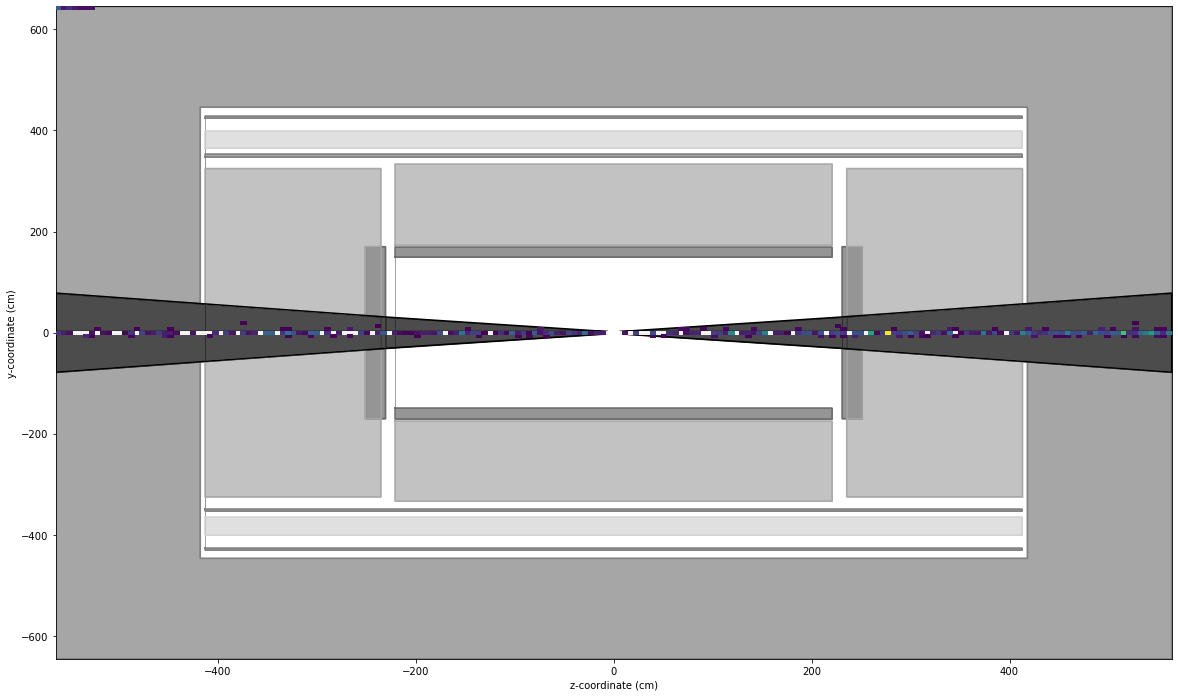

In [52]:
fss = 0
Lss = 116
geom = "approximate_muon_detector_2"
collision = 'mu+e-'
sims = SimulateDetector(cc, geom, particle, Lss = Lss).run(show_components = 1, show_time = 1, collision = collision)
plot(sims)

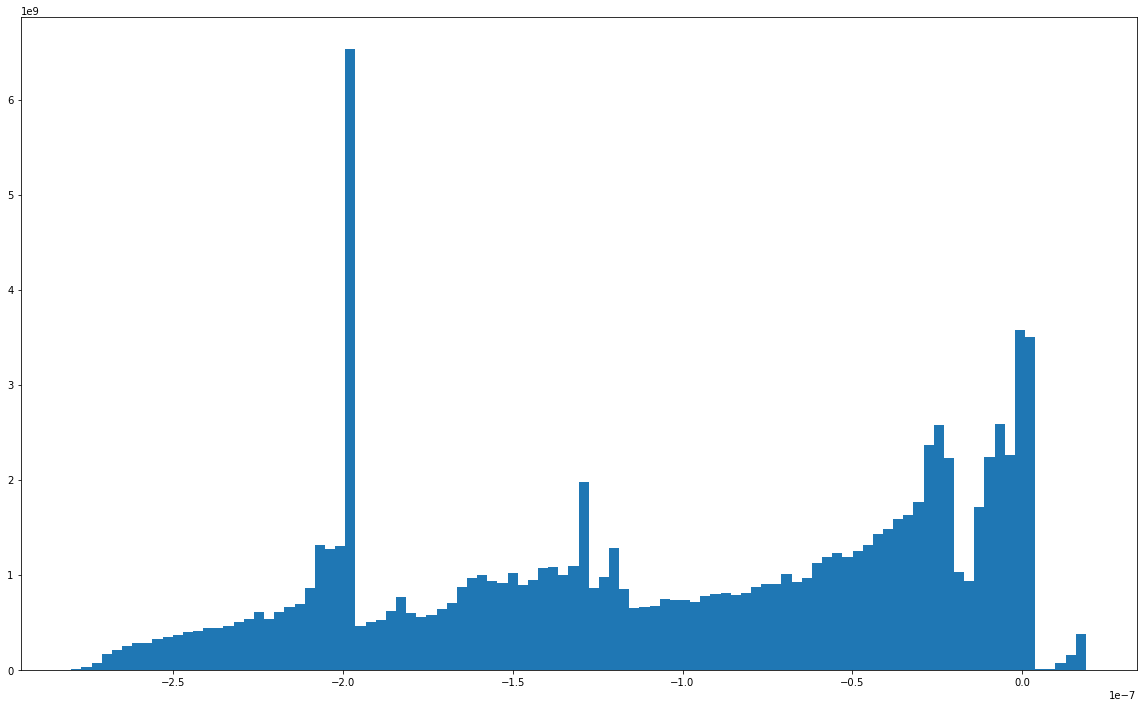

In [6]:
plt.figure(figsize=(20,12))
plt.hist(sim.times, bins = 100, weights = sim.w)
plt.show()

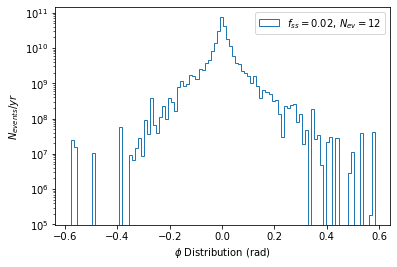

In [36]:
arrx2 = np.concatenate((sim.arrx, sim2.arrx))
arry2 = np.concatenate((sim.arry, sim2.arry))
arrw2 = np.concatenate((sim.w, sim2.w))
phi2 = np.arctan(arrx2/arry2)
plt.hist(phi2, bins =100,weights = arrw2, histtype = 'step', label=r'$f_{ss} = 0.02$, $N_{ev} = 12$')

#plt.xlim(-0.5, 0.5)
plt.yscale('log')
plt.ylabel(r'$N_{events}/yr$')
plt.xlabel(r'$\phi$ Distribution (rad)')
plt.legend(loc='best')

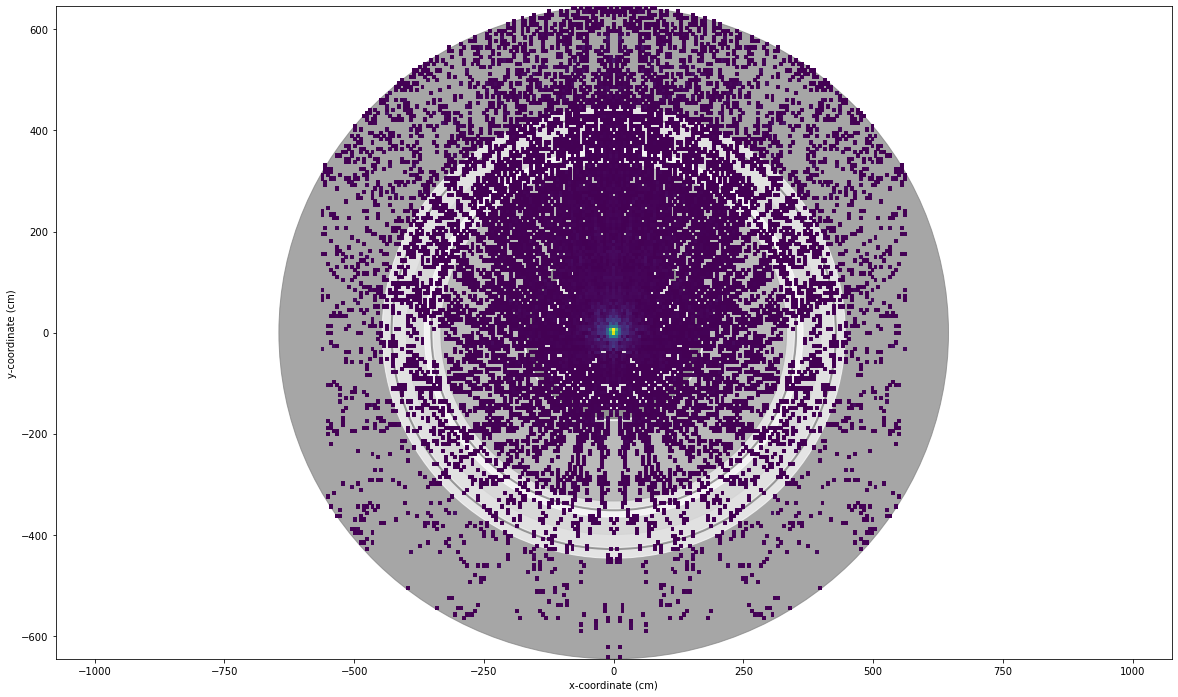

In [27]:
sim.plot(sim2, orientation = 'x-y')

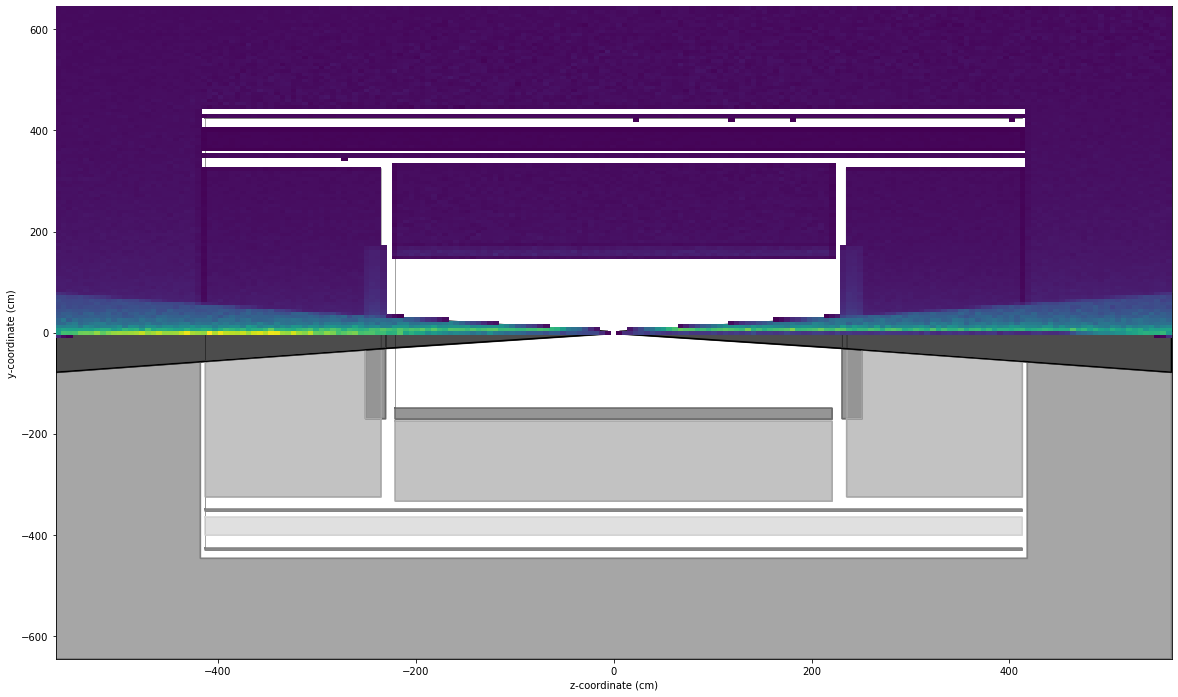

In [13]:
plt.figure(figsize=(20,12))
arrz = np.concatenate((sim.arrz, sim2.arrz))
arry = np.concatenate((sim.arry, sim2.arry))
arrw = np.concatenate((sim.w, sim2.w))
bs = np.linspace(-1* 564, 564, 200)
bs2 = np.linspace(-1*645, 645, 200)
plt.hist2d(arrz, arry, alpha = 1, zorder = 10, bins = (bs, bs2), weights = arrw, cmin = 1)
#plt.xlim(-0.5, 0.5)
plot_sim(geom)
plt.show()


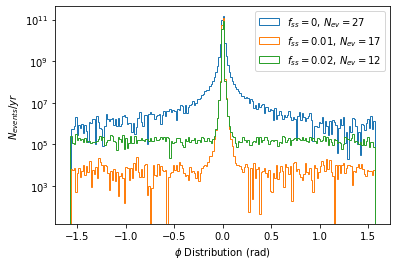

In [100]:
arrx2 = np.concatenate((sim.arrx, sim2.arrx))
arry2 = np.concatenate((sim.arry, sim2.arry))
arrw2 = np.concatenate((sim.w, sim2.w))
phi2 = np.arctan(arrx2/arry2)

plt.hist(phi1, bins =100,weights = arrw1, histtype = 'step', label=r'$f_{ss} = 0$, $N_{ev} = 27$')
plt.hist(phi , bins =100,weights = arrw,  histtype = 'step', label=r'$f_{ss} = 0.01$, $N_{ev} = 17$')
plt.hist(phi2, bins =100,weights = arrw2, histtype = 'step', label=r'$f_{ss} = 0.02$, $N_{ev} = 12$')

#plt.xlim(-0.5, 0.5)
plt.yscale('log')
plt.ylabel(r'$N_{events}/yr$')
plt.xlabel(r'$\phi$ Distribution (rad)')
plt.legend(loc='best')
#plt.savefig('plots_Luc/paper/phi_dist.jpg', bbox_inches = 'tight', dpi = 300)

In [121]:
del phi, phi2, phi1

NameError: name 'phi' is not defined

In [117]:
del cc

NameError: name 'cc' is not defined

In [120]:
che()

mem
Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   548   1128.7 MiB   1128.7 MiB           1   def che():
   549                                             print('mem')




In [42]:
sim.total_count

363223839610.9292

In [53]:
Lc_factor = 0
geom = "approximate_muon_detector_2"
particle = 'both'
sim,sim2 = SimulateDetector(cc, Lc_factor, geom, particle).run()

267434591777.1697
+----------------+------------+-------------+--------------+
| Detector Parts | ν_e events | ν_μ events  | Total events |
+----------------+------------+-------------+--------------+
| muon_detector  | 5.426e+10  |  3.065e+10  |  8.490e+10   |
|    solenoid    | 2.589e+09  |  1.531e+09  |  4.119e+09   |
|      hcal      | 2.949e+10  |  1.731e+10  |  4.681e+10   |
|      ecal      | 6.191e+09  |  3.742e+09  |  9.933e+09   |
|    nozzles     | 7.505e+10  |  4.662e+10  |  1.217e+11   |
|     TOTAL      | 1.676e+11  |  9.985e+10  |  2.674e+11   |
+----------------+------------+-------------+--------------+
+-----------------+-----------+-----------+-----------+
| Simulation Time |  time ν_μ |  time ν_e |   TOTAL   |
+-----------------+-----------+-----------+-----------+
|       init      | 1.346e-03 | 1.342e-03 | 2.688e-03 |
|     init obj    | 2.105e-03 | 2.078e-03 | 4.183e-03 |
|    other obj    | 1.255e-01 | 1.229e-01 | 2.484e-01 |
|      probs      | 2.185e-02 | 2.17

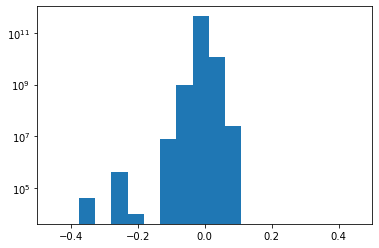

In [49]:
arrx = np.concatenate((sim.arrx, sim2.arrx))
arry = np.concatenate((sim.arry, sim2.arry))
arrw = np.concatenate((sim.w, sim2.w))
phi = np.arctan(arrx/arry)
plt.hist(phi, weights = arrw)
plt.xlim(-0.5, 0.5)
plt.yscale('log')

+----------------+------------+-------------+--------------+
| Detector Parts | ν_e events | ν_μ events  | Total events |
+----------------+------------+-------------+--------------+
| muon_detector  | 2.837e+09  |  1.673e+09  |  4.511e+09   |
|    solenoid    | 0.000e+00  |  0.000e+00  |  0.000e+00   |
|      hcal      | 8.755e+00  |  4.538e+00  |  1.329e+01   |
|      ecal      | 1.714e+01  |  9.162e+00  |  2.630e+01   |
|    nozzles     | 1.617e+09  |  9.650e+08  |  2.582e+09   |
|     TOTAL      | 4.454e+09  |  2.638e+09  |  7.092e+09   |
+----------------+------------+-------------+--------------+
+-----------------+-----------+-----------+-----------+
| Simulation Time |  time ν_μ |  time ν_e |   TOTAL   |
+-----------------+-----------+-----------+-----------+
|       init      | 2.591e-01 | 2.524e-01 | 5.115e-01 |
|     init obj    | 4.864e+00 | 1.852e-01 | 5.049e+00 |
|    other obj    | 1.961e+01 | 1.417e+01 | 3.378e+01 |
|      probs      | 2.583e+00 | 2.548e+00 | 5.131e+00 

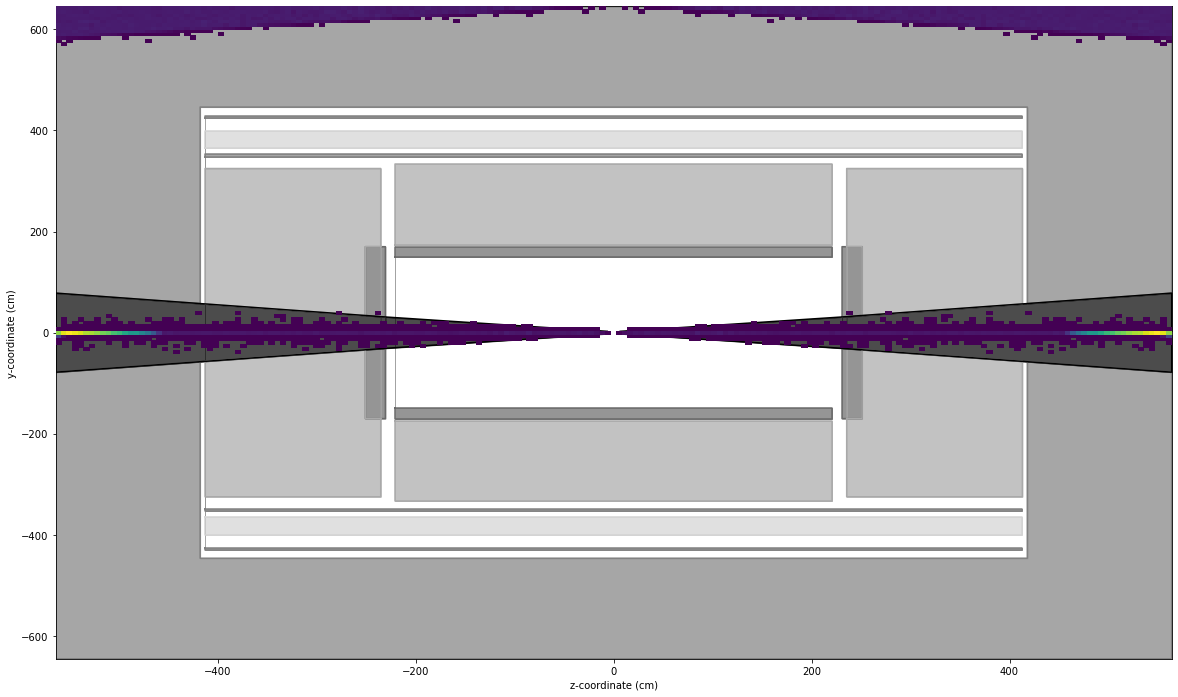

In [5]:
import pickle
with open('mutristan_small.pkl', 'rb') as f:
    cc1 = pickle.load(f)
fss = 0.037
geom = "approximate_muon_detector_2"
particle = 'both'
sim11,sim12 = SimulateDetector(cc1, fss, geom, particle).run()
sim11.plot(sim12)

+----------------+------------+-------------+--------------+
| Detector Parts | ν_e events | ν_μ events  | Total events |
+----------------+------------+-------------+--------------+
| muon_detector  | 1.234e+01  |  1.558e+01  |  2.792e+01   |
|    solenoid    | 0.000e+00  |  0.000e+00  |  0.000e+00   |
|      hcal      | 9.245e+00  |  4.974e+00  |  1.422e+01   |
|      ecal      | 2.316e+01  |  1.204e+01  |  3.520e+01   |
|    nozzles     | 1.825e+09  |  1.086e+09  |  2.910e+09   |
|     TOTAL      | 1.825e+09  |  1.086e+09  |  2.910e+09   |
+----------------+------------+-------------+--------------+
+-----------------+-----------+-----------+-----------+
| Simulation Time |  time ν_μ |  time ν_e |   TOTAL   |
+-----------------+-----------+-----------+-----------+
|       init      | 2.394e-01 | 2.423e-01 | 4.818e-01 |
|     init obj    | 1.819e-01 | 1.818e-01 | 3.637e-01 |
|    other obj    | 1.412e+01 | 1.405e+01 | 2.816e+01 |
|      probs      | 2.571e+00 | 2.530e+00 | 5.101e+00 

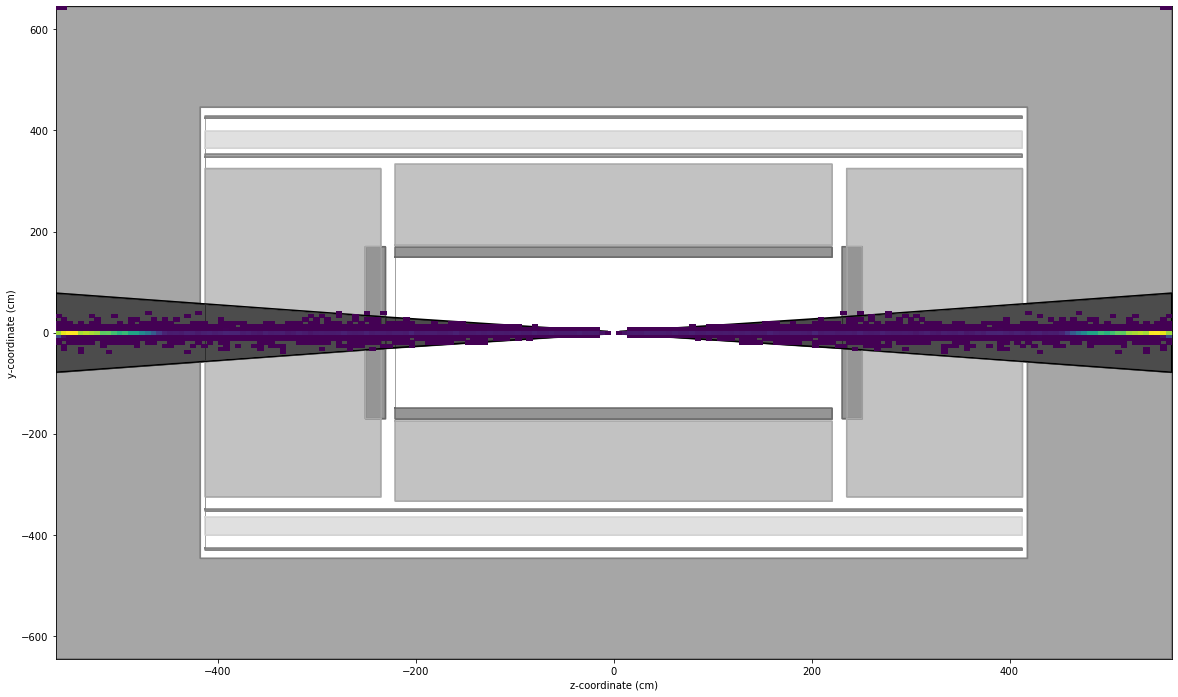

In [10]:
fss = 0.039
geom = "approximate_muon_detector_2"
particle = 'both'
sim11,sim12 = SimulateDetector(cc1, fss, geom, particle).run()
sim11.plot(sim12)

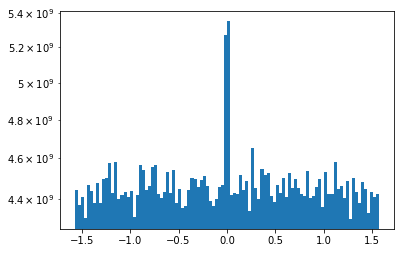

In [7]:
arrx = np.concatenate((sim11.arrx, sim12.arrx))
arry = np.concatenate((sim11.arry, sim12.arry))
arrw = np.concatenate((sim11.w, sim12.w))
phi = np.arctan(arrx/arry)
plt.hist(phi, bins =100,weights = arrw)
#plt.xlim(-0.5, 0.5)
plt.yscale('log')
del cc1

In [5]:
Lc_factor = 4
sim13,sim14 = SimulateDetector(cc1, Lc_factor, geom, particle).run()
del cc1

+----------------+------------+-------------+--------------+
| Detector Parts | ν_e events | ν_μ events  | Total events |
+----------------+------------+-------------+--------------+
| muon_detector  | 4.336e+04  |  1.652e+04  |  5.988e+04   |
|    solenoid    | 2.981e-15  |  2.770e-16  |  3.258e-15   |
|      hcal      | 2.873e+05  |  1.301e+05  |  4.175e+05   |
|      ecal      | 2.228e+05  |  1.075e+05  |  3.304e+05   |
|    nozzles     | 2.803e+11  |  1.663e+11  |  4.466e+11   |
|     TOTAL      | 2.803e+11  |  1.663e+11  |  4.466e+11   |
+----------------+------------+-------------+--------------+
+-----------------+-----------+-----------+-----------+
| Simulation Time |  time ν_μ |  time ν_e |   TOTAL   |
+-----------------+-----------+-----------+-----------+
|       init      | 4.706e-01 | 4.673e-01 | 9.379e-01 |
|     init obj    | 5.183e-01 | 5.065e-01 | 1.025e+00 |
|    other obj    | 3.871e+01 | 3.849e+01 | 7.720e+01 |
|      probs      | 6.640e+00 | 6.613e+00 | 1.325e+01 

In [7]:
with open('mutristan_large.pkl', 'rb') as f:
    cc2 = pickle.load(f)
Lc_factor = 0
geom = "approximate_muon_detector_2"
particle = 'both'
sim21,sim22 = SimulateDetector(cc2, Lc_factor, geom, particle).run()

+----------------+------------+-------------+--------------+
| Detector Parts | ν_e events | ν_μ events  | Total events |
+----------------+------------+-------------+--------------+
| muon_detector  | 9.288e+10  |  5.561e+10  |  1.485e+11   |
|    solenoid    | 4.518e+09  |  2.698e+09  |  7.216e+09   |
|      hcal      | 5.114e+10  |  3.073e+10  |  8.187e+10   |
|      ecal      | 1.040e+10  |  6.259e+09  |  1.666e+10   |
|    nozzles     | 1.296e+11  |  7.808e+10  |  2.077e+11   |
|     TOTAL      | 2.885e+11  |  1.734e+11  |  4.619e+11   |
+----------------+------------+-------------+--------------+
+-----------------+-----------+-----------+-----------+
| Simulation Time |  time ν_μ |  time ν_e |   TOTAL   |
+-----------------+-----------+-----------+-----------+
|       init      | 2.657e-01 | 2.597e-01 | 5.253e-01 |
|     init obj    | 1.693e-01 | 1.642e-01 | 3.335e-01 |
|    other obj    | 1.543e+01 | 1.897e+01 | 3.439e+01 |
|      probs      | 2.612e+00 | 3.926e+00 | 6.538e+00 

In [8]:
Lc_factor = 4
sim23,sim24 = SimulateDetector(cc2, Lc_factor, geom, particle).run()
del cc2

+----------------+------------+-------------+--------------+
| Detector Parts | ν_e events | ν_μ events  | Total events |
+----------------+------------+-------------+--------------+
| muon_detector  | 6.282e+03  |  2.546e+03  |  8.828e+03   |
|    solenoid    | 0.000e+00  |  2.786e-16  |  2.786e-16   |
|      hcal      | 4.200e+04  |  2.285e+04  |  6.485e+04   |
|      ecal      | 3.611e+04  |  1.918e+04  |  5.529e+04   |
|    nozzles     | 3.780e+11  |  2.264e+11  |  6.044e+11   |
|     TOTAL      | 3.780e+11  |  2.264e+11  |  6.044e+11   |
+----------------+------------+-------------+--------------+
+-----------------+-----------+-----------+-----------+
| Simulation Time |  time ν_μ |  time ν_e |   TOTAL   |
+-----------------+-----------+-----------+-----------+
|       init      | 2.837e-01 | 2.746e-01 | 5.583e-01 |
|     init obj    | 2.808e-01 | 2.698e-01 | 5.507e-01 |
|    other obj    | 2.072e+01 | 2.074e+01 | 4.146e+01 |
|      probs      | 3.827e+00 | 3.793e+00 | 7.620e+00 

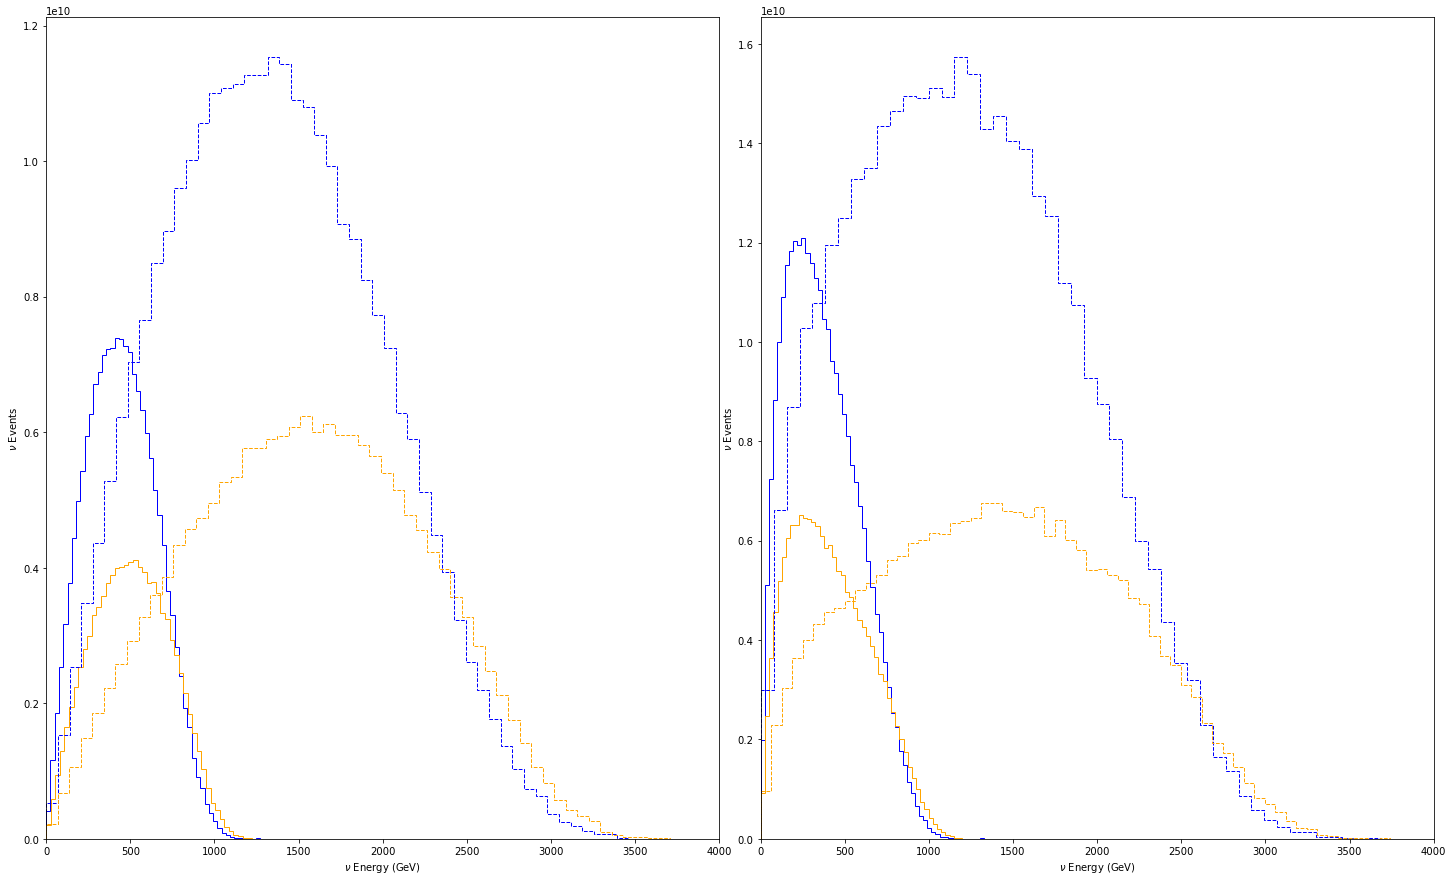

In [11]:
import matplotlib.colors as mcolors
bs = np.linspace(-564, 564, 200)
bs2 = np.linspace(-645, 645, 200)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (20,12))
fig.tight_layout()


ax = axs[0]
ax.hist(sim12.E, weights = np.sum(sim12.part_face_counts, axis=1), bins = 100, histtype = 'step', color='blue', label=r'$\nu_e$ (s)')
ax.hist(sim11.E, weights = np.sum(sim11.part_face_counts, axis=1), bins = 100, histtype = 'step', color='orange', label=r'$\nu_mu$ (s)')
ax.hist(sim22.E, weights = np.sum(sim22.part_face_counts, axis=1), bins = 100, histtype = 'step', color='blue', label=r'$\nu_e$ (L)', linestyle ='--')
ax.hist(sim21.E, weights = np.sum(sim21.part_face_counts, axis=1), bins = 100, histtype = 'step', color='orange', label=r'$\nu_mu$ (L)', linestyle='--')
ax.set_xlim(0,4000)
ax.set_xlabel(r'$\nu$ Energy (GeV)')
ax.set_ylabel(r'$\nu$ Events')

ax = axs[1]
ax.hist(sim14.E, weights = np.sum(sim14.part_face_counts, axis=1), bins = 100, histtype = 'step', color='blue', label=r'$\nu_e$ (s)')
ax.hist(sim13.E, weights = np.sum(sim13.part_face_counts, axis=1), bins = 100, histtype = 'step', color='orange', label=r'$\nu_mu$ (s)')
ax.hist(sim24.E, weights = np.sum(sim24.part_face_counts, axis=1), bins = 100, histtype = 'step', color='blue', label=r'$\nu_e$ (L)', linestyle ='--')
ax.hist(sim23.E, weights = np.sum(sim23.part_face_counts, axis=1), bins = 100, histtype = 'step', color='orange', label=r'$\nu_mu$ (L)', linestyle='--')
ax.set_xlabel(r'$\nu$ Energy (GeV)')
ax.set_ylabel(r'$\nu$ Events')
ax.set_xlim(0,4000)

plt.show()

In [8]:
che()

mem
Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   545    558.9 MiB    558.9 MiB           1   @profile
   546                                         def che():
   547    558.9 MiB      0.0 MiB           1       print('mem')




In [11]:
del sim
del sim2
del sim12
del sim1

In [13]:
del cc

In [14]:
del cc1

In [9]:
che()

mem
Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   545   4252.8 MiB   4252.8 MiB           1   @profile
   546                                         def che():
   547   4252.8 MiB      0.0 MiB           1       print('mem')




In [58]:
1e10 /(3.154e7*0.7)

452.9395778603134

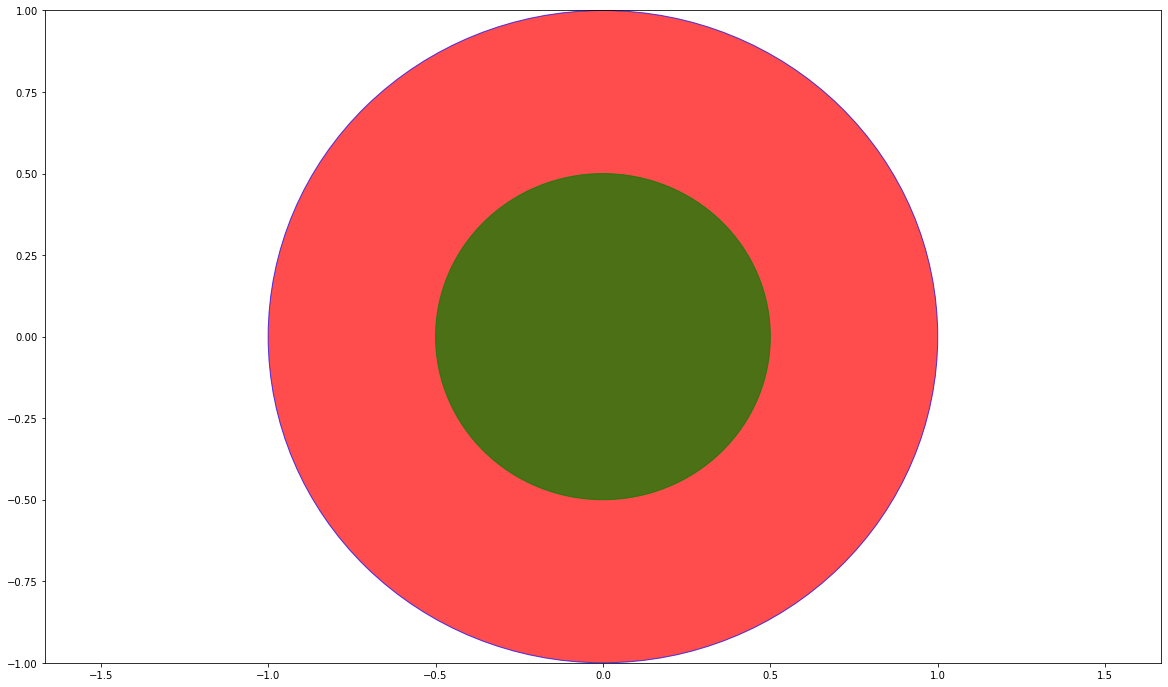

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize =(20,12))
circle=plt.Circle((0,0), 1, zorder = 1, alpha = 0.7, edgecolor='b', facecolor='r')
ax.add_artist(circle)
circle=plt.Circle((0,0), 0.5, zorder = 2, alpha = 0.7, edgecolor='g', facecolor='g')
ax.add_artist(circle)
plt.xlim(-1*20/12, 1*20/12)
plt.ylim(-1,1)
plt.show()